In [1]:
import pandas as pd
import numpy as np
import copy

# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_woods

In [2]:
maze = gym.make('Woods1-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()

This is how maze looks like
<class 'list'>
['.', '.', '.', 'F', 'O', 'O', '.', '.']

□ □ □ □ □
□ X □ □ □
■ ■ $ □ □
■ ■ ■ □ □
■ ■ ■ □ □


In [3]:
from lcs.agents.xcs import XCS
from lcs.agents.xcs import Configuration as XCSConfig
from lcs.agents.xncs import XNCS
from lcs.agents.xncs import Configuration as XNCSConfig

from utils.xcs_utils import *
from utils.nxcs_utils import *

XCScfg = XCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_metrics)

XNCScfg_no_mods = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20,
                    update_env_input = False,
                    cover_env_input = False,)

XNCScfg_update = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20,
                    update_env_input = True,
                    cover_env_input = False,)

XNCScfg_cover = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20,
                    update_env_input = False,
                    cover_env_input = True,)

XNCScfg_both = XNCSConfig(number_of_actions=8,
                    max_population=1600,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.08,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=0.8,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0.1,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_metrics,
                    lmc=10,
                    lem=20,
                    update_env_input = True,
                    cover_env_input = True,)

In [4]:
from utils.xcs_utils import avg_experiment as XCSExp
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 10
explore = 0
exploit = 2500
print("Starting XCS")
df = XCSExp(maze=maze,
             cfg=XCScfg,
             number_of_tests=number_of_experiments,
             explore_trials=0,
             exploit_trials=exploit + explore,
             pre_generate=True
           )
print("Starting XNCS")
df_no_mods = XNCSExp(
    maze=maze,
    cfg=XNCScfg_no_mods,
    number_of_tests=number_of_experiments,
    explore_trials=0,
    exploit_trials=exploit + explore,
    pre_generate=True
    )
print("Starting XNCS with enviromental input during cover")
df_cover = XNCSExp(
    maze=maze,
    cfg=XNCScfg_cover,
    number_of_tests=number_of_experiments,
    explore_trials=0,
    exploit_trials=exploit + explore,
    pre_generate=True
    )
print("Starting XNCS with enviromental input during update")
df_update = XNCSExp(
    maze=maze,
    cfg=XNCScfg_update,
    number_of_tests=number_of_experiments,
    explore_trials=0,
    exploit_trials=exploit + explore,
    pre_generate=True
    )
print("Starting XNCS with all enviromental inputs")
df_both = XNCSExp(
    maze=maze,
    cfg=XNCScfg_both,
    number_of_tests=number_of_experiments,
    explore_trials=0,
    exploit_trials=exploit + explore,
    pre_generate=True

)

Starting XCS
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS with enviromental input during cover
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experiment
Executing 8 experiment
Executing 9 experiment
Starting XNCS with enviromental input during update
Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment
Executing 5 experiment
Executing 6 experiment
Executing 7 experim

In [5]:
df_all = pd.DataFrame(df)

df_all['steps_in_trial_no_mods']=df_no_mods['steps_in_trial']
df_all['steps_in_trial_update'] =df_update['steps_in_trial']
df_all['steps_in_trial_cover']  =df_cover['steps_in_trial']
df_all['steps_in_trial_both']   =df_both['steps_in_trial']

df_all['population_no_mods']=df_no_mods['population']
df_all['population_update'] =df_update['population']
df_all['population_cover']  =df_cover['population']
df_all['population_both']   =df_both['population']

df_all['average_specificity_no_mods']=df_no_mods['average_specificity']
df_all['average_specificity_update']=df_update['average_specificity']
df_all['average_specificity_cover']=df_cover['average_specificity']
df_all['average_specificity_both']=df_both['average_specificity']

df['fraction_accuracy_no_mods']=df_no_mods['fraction_accuracy']
df['fraction_accuracy_update']=df_update['fraction_accuracy']
df['fraction_accuracy_cover']=df_cover['fraction_accuracy']
df['fraction_accuracy_both']=df_both['fraction_accuracy']

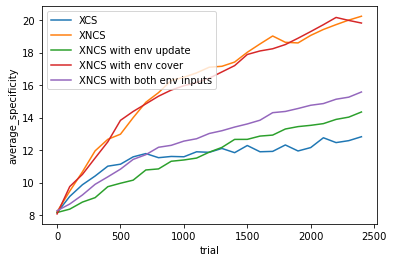

In [6]:
ax = df[['average_specificity',
         "average_specificity_no_mods",
         "average_specificity_update",
         "average_specificity_cover",
         "average_specificity_both"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

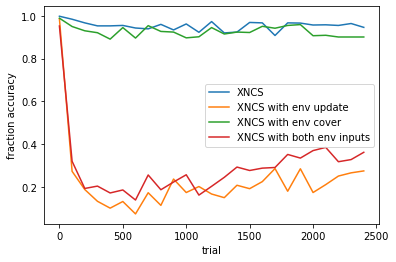

In [7]:
ax = df[["fraction_accuracy_no_mods",
         "fraction_accuracy_update",
         "fraction_accuracy_cover",
         "fraction_accuracy_both"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

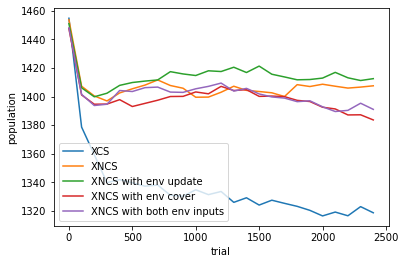

In [8]:
ax = df[['population',
         "population_no_mods",
         "population_update",
         "population_cover",
         "population_both",
        ]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

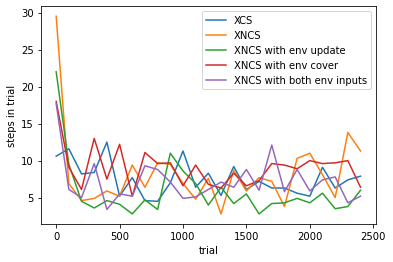

In [9]:
ax = df[['steps_in_trial',
         "steps_in_trial_no_mods",
         "steps_in_trial_update",
         "steps_in_trial_cover",
         "steps_in_trial_both",
        ]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["XCS","XNCS" , "XNCS with env update", "XNCS with env cover", "XNCS with both env inputs"])

In [10]:
print(sum(df["steps_in_trial"])/number_of_experiments)
print(sum(df["steps_in_trial_no_mods"])/number_of_experiments)
print(sum(df["steps_in_trial_update"])/number_of_experiments)
print(sum(df["steps_in_trial_cover"])/number_of_experiments)
print(sum(df["steps_in_trial_both"])/number_of_experiments)

18.82
20.690000000000005
14.520000000000001
22.64
17.940000000000005


In [11]:
display(df)
display(df_no_mods)
display(df_update)
display(df_cover)
display(df_both)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,steps_in_trial_no_mods,steps_in_trial_update,steps_in_trial_cover,steps_in_trial_both,...,population_cover,population_both,average_specificity_no_mods,average_specificity_update,average_specificity_cover,average_specificity_both,fraction_accuracy_no_mods,fraction_accuracy_update,fraction_accuracy_cover,fraction_accuracy_both
trial,,,,,,,,,,,,,,,,,,,,,
0,10.6,1000.000000,0.080845,1454.8,1600.0,8.147375,29.5,22.0,18.0,17.7,...,1447.5,1448.1,8.209375,8.158687,8.071187,8.266500,0.998,0.985931,0.988909,0.952294
100,11.6,1081.409432,0.126824,1378.6,1600.0,9.147437,6.9,9.5,9.1,6.1,...,1401.1,1401.5,9.472000,8.364625,9.754062,8.680438,0.984,0.273000,0.950000,0.320000
200,8.2,1237.322809,0.083144,1359.3,1600.0,9.867500,4.6,4.5,6.1,5.0,...,1394.6,1393.7,10.662187,8.799438,10.501500,9.236875,0.967,0.188000,0.930000,0.193000
300,8.4,1289.268347,0.078831,1339.7,1600.0,10.401812,4.9,3.6,13.0,9.6,...,1394.7,1394.6,11.951063,9.072563,11.510312,9.892125,0.953,0.133000,0.921000,0.204000
400,12.5,1102.119891,0.121335,1341.8,1600.0,11.008250,5.9,4.6,7.5,3.4,...,1397.8,1404.2,12.659250,9.746438,12.503938,10.351062,0.953,0.101000,0.891000,0.172000
500,5.2,1307.879868,0.051734,1339.6,1600.0,11.129875,5.2,4.1,12.2,5.5,...,1393.0,1403.5,12.976000,9.958375,13.828375,10.825375,0.955,0.132000,0.945000,0.186000
600,7.7,1270.171486,0.085215,1337.2,1600.0,11.581125,9.4,2.8,5.2,5.2,...,1395.2,1406.2,13.993563,10.148000,14.373938,11.424375,0.943,0.074000,0.896000,0.139000
700,4.6,1382.957440,0.049006,1338.0,1600.0,11.783562,6.4,4.7,11.1,9.3,...,1397.4,1406.6,14.939500,10.774750,14.841875,11.715312,0.939,0.173000,0.954000,0.256000
800,4.5,1428.284205,0.053135,1330.9,1600.0,11.529562,9.7,3.4,9.6,8.8,...,1400.0,1403.1,15.532188,10.839437,15.312750,12.170625,0.960,0.114000,0.927000,0.187000


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,29.5,600.000000,0.490014,1600.0,1453.7,8.209375,0.998
100,6.9,1309.324421,0.101827,1600.0,1407.2,9.472000,0.984
200,4.6,1370.736158,0.057202,1600.0,1400.4,10.662187,0.967
300,4.9,1516.567799,0.063175,1600.0,1396.9,11.951063,0.953
400,5.9,1364.954911,0.074314,1600.0,1402.5,12.659250,0.953
500,5.2,1459.080865,0.063073,1600.0,1405.4,12.976000,0.955
600,9.4,1123.485499,0.114700,1600.0,1408.0,13.993563,0.943
700,6.4,1392.179666,0.103321,1600.0,1411.6,14.939500,0.939
800,9.7,1229.345901,0.160070,1600.0,1407.7,15.532188,0.960


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,22.0,800.000000,0.338221,1600.0,1451.0,8.158687,0.985931
100,9.5,1226.460707,0.139027,1600.0,1406.1,8.364625,0.273000
200,4.5,1377.775117,0.078440,1600.0,1399.8,8.799438,0.188000
300,3.6,1454.771165,0.052627,1600.0,1402.3,9.072563,0.133000
400,4.6,1400.994245,0.069092,1600.0,1407.8,9.746438,0.101000
500,4.1,1427.040538,0.068050,1600.0,1409.8,9.958375,0.132000
600,2.8,1596.609301,0.035163,1600.0,1410.8,10.148000,0.074000
700,4.7,1335.324577,0.067855,1600.0,1411.6,10.774750,0.173000
800,3.4,1687.076131,0.051881,1600.0,1417.4,10.839437,0.114000


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,18.0,800.000000,0.237562,1600.0,1447.5,8.071187,0.988909
100,9.1,1243.514221,0.096811,1600.0,1401.1,9.754062,0.950000
200,6.1,1314.374620,0.076755,1600.0,1394.6,10.501500,0.930000
300,13.0,1140.731909,0.136010,1600.0,1394.7,11.510312,0.921000
400,7.5,1283.625275,0.086451,1600.0,1397.8,12.503938,0.891000
500,12.2,1244.886449,0.127724,1600.0,1393.0,13.828375,0.945000
600,5.2,1319.702820,0.064206,1600.0,1395.2,14.373938,0.896000
700,11.1,1268.438479,0.122527,1600.0,1397.4,14.841875,0.954000
800,9.6,1371.086770,0.096431,1600.0,1400.0,15.312750,0.927000


,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,17.7,800.000000,0.363859,1600.0,1448.1,8.266500,0.952294
100,6.1,1311.344022,0.112446,1600.0,1401.5,8.680438,0.320000
200,5.0,1405.412021,0.093146,1600.0,1393.7,9.236875,0.193000
300,9.6,1452.419037,0.177421,1600.0,1394.6,9.892125,0.204000
400,3.4,1549.959119,0.060312,1600.0,1404.2,10.351062,0.172000
500,5.5,1270.033639,0.120645,1600.0,1403.5,10.825375,0.186000
600,5.2,1285.804782,0.099456,1600.0,1406.2,11.424375,0.139000
700,9.3,1222.694849,0.187226,1600.0,1406.6,11.715312,0.256000
800,8.8,1266.459666,0.182160,1600.0,1403.1,12.170625,0.187000
